In [1]:
import json,pandas as pd, numpy as np, os,csv,random,time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import csv,time
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from time import time

In [2]:
import os
os.getcwd()

'/home/zxt/code/final/2k_new'

In [3]:
csv_file = '/home/zxt/data/final/data.csv'
csv_data = pd.read_csv(csv_file, low_memory=False)
df = pd.DataFrame(csv_data)

In [4]:
len(df)

212266

In [5]:
df = df[df['image_id']!='S7_T12_R1_IMAG0179.JPG']

In [6]:
len(df)

212265

In [7]:
elephant = df[df['label']=='elephant']
wild_boar = df[df['label']=='wild_boar']
gazellethomosons = df[df['label']=='gazellethomosons']
squirrel = df[df['label']=='squirrel']
hedgehog= df[df['label']=='hedgehog']

guineafowl = df[df['label']=='guineafowl']
moose = df[df['label']=='moose']
bobcat = df[df['label']=='bobcat']
bird = df[df['label']=='bird']
fox = df[df['label']=='fox']

giraffe = df[df['label']=='giraffe']
buffalo = df[df['label']=='buffalo']
hare = df[df['label']=='hare']
vehicle = df[df['label']=='vehicle']
wildebeest = df[df['label']=='wildebeest']

cattle = df[df['label']=='cattle']
skunk = df[df['label']=='skunk']
lion = df[df['label']=='lion']
zebra = df[df['label']=='zebra']
black_bear = df[df['label']=='black_bear']

In [8]:
elephant_2k = elephant.sample(n=7000,random_state=912,replace=False)
wild_boar_2k = wild_boar.sample(n=7000,random_state=912,replace=False)
gazellethomosons_2k = gazellethomosons.sample(n=7000,random_state=912,replace=False)
squirrel_2k = squirrel.sample(n=7000,random_state=912,replace=False)
hedgehog_2k = hedgehog.sample(n=7000,random_state=912,replace=False)

guineafowl_2k = guineafowl.sample(n=7000,random_state=912,replace=False)
moose_2k = moose.sample(n=7000,random_state=912,replace=False)
bobcat_2k = bobcat.sample(n=7000,random_state=912,replace=False)
bird_2k = bird.sample(n=7000,random_state=912,replace=False)
fox_2k = fox.sample(n=7000,random_state=912,replace=False)

giraffe_2k = giraffe.sample(n=7000,random_state=912,replace=False)
buffalo_2k = buffalo.sample(n=7000,random_state=912,replace=False)
hare_2k = hare.sample(n=7000, random_state=912,replace=False)
vehicle_2k = vehicle.sample(n=7000,random_state=912,replace=False)
wildebeest_2k = wildebeest.sample(n=7000,random_state=912,replace=False)

cattle_2k = cattle.sample(n=7000,random_state=912,replace=False)
skunk_2k = skunk.sample(n=7000,random_state=912,replace=False)
lion_2k = lion.sample(n=7000,random_state=912,replace=False)
zebra_2k = zebra.sample(n=7000,random_state=912,replace=False)
black_bear_2k = black_bear.sample(n=7000,random_state=912,replace=False)

In [9]:
len(cattle_2k)

7000

In [10]:
df_all = pd.concat([elephant_2k,wild_boar_2k,gazellethomosons_2k,squirrel_2k,hedgehog_2k,guineafowl_2k,moose_2k,bobcat_2k,bird_2k,fox_2k,giraffe_2k,buffalo_2k,hare_2k,vehicle_2k,wildebeest_2k,cattle_2k,skunk_2k,lion_2k,zebra_2k,black_bear_2k ])

In [11]:
len(df_all)

140000

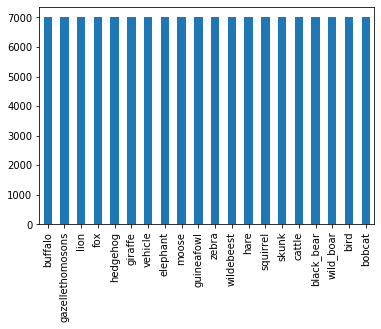

In [12]:
df_all['label'].value_counts().plot.bar()

In [13]:
train_df, validate0_df = train_test_split(df_all, test_size=0.30, random_state=522)
train_df = train_df.reset_index(drop=True)
validate0_df = validate0_df.reset_index(drop=True)

In [14]:
validate_df, test_df = train_test_split(validate0_df, test_size=0.30, random_state=626)
validate_df = validate_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [15]:
len(train_df)

98000

### train set

In [16]:
imglist = train_df['image_id'].tolist()
X_train = np.empty((len(imglist),128,128,3))
X_train.shape

MemoryError: Unable to allocate array with shape (98000, 128, 128, 3) and data type float64

In [17]:
Y_train = np.empty((len(imglist),1))
Y_train.shape

(98000, 1)

In [19]:
start = time()

path = '/home/zxt/data/raw_data_all/'
count =0
nonelist=[]
for img_name in imglist:
    img_path = path + img_name
    try:
        img = image.load_img(img_path, target_size=(128,128))
        X_train[count]=img
        count+=1
    except:
        nonelist.append(img_path)
        
end = time()
print("Running time: %s seconds"%(end - start))

Running time: 9122.731010913849 seconds


In [20]:
len(nonelist)

0

In [21]:
nonelist

[]

In [17]:
path = '/home/zxt/data/raw_data_all/'

In [20]:
# train_df

In [22]:
label = train_df['label']
Y_train = [i for i in label]
Y_train = np.array(Y_train)
Y_train = Y_train.reshape(len(Y_train),1)
Y_train.shape

(70000, 1)

In [23]:
Y_train

array([['hare'],
       ['hedgehog'],
       ['fox'],
       ...,
       ['gazellethomosons'],
       ['vehicle'],
       ['hare']], dtype='<U16')

In [24]:
X_train[0]

array([[[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  1.,   1.,   1.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  1.,   1.,   1.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       ...,

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   6.,   7.],
        [ 14.,   3.,  33.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [ 42.,  84.,   0.],
        [ 20.,   0.,  23.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [255., 2

In [25]:
len(Y_train)

70000

In [26]:
len(X_train)

70000

In [27]:
Y_train

array([['hare'],
       ['hedgehog'],
       ['fox'],
       ...,
       ['gazellethomosons'],
       ['vehicle'],
       ['hare']], dtype='<U16')

In [28]:
np.save('/home/zxt/code/final/5k_new/X_train_128',X_train)
np.save('/home/zxt/code/final/5k_new/Y_train_128',Y_train)

### validate set

In [18]:
validate_df.shape

(21000, 2)

In [19]:
imglist = validate_df['image_id'].tolist()
X_validate = np.empty((len(imglist),128,128,3))
X_validate.shape

(21000, 128, 128, 3)

In [20]:
start = time()
count=0
nonelist=[]
for img_name in imglist:
    img_path = path + img_name
    try:
        img = image.load_img(img_path, target_size=(128,128))
        X_validate[count]=img
        count+=1
    except:
        nonelist.append(img_path)
        
end = time()
print("Running time: %s seconds"%(end - start))

Running time: 2669.0513768196106 seconds


In [21]:
len(nonelist)

0

In [22]:
nonelist

[]

In [23]:
label = validate_df['label']
Y_validate = [i for i in label]
Y_validate = np.array(Y_validate)
Y_validate = Y_validate.reshape(len(Y_validate),1)
Y_validate.shape

(21000, 1)

In [24]:
X_validate[0]

array([[[253., 244., 239.],
        [240., 237., 232.],
        [228., 223., 217.],
        ...,
        [243., 219., 193.],
        [244., 227., 201.],
        [242., 231., 211.]],

       [[250., 245., 241.],
        [230., 224., 224.],
        [228., 221., 215.],
        ...,
        [232., 216., 200.],
        [245., 230., 209.],
        [243., 235., 214.]],

       [[242., 234., 231.],
        [246., 231., 234.],
        [231., 223., 220.],
        ...,
        [243., 230., 213.],
        [241., 229., 213.],
        [236., 223., 204.]],

       ...,

       [[220., 220., 220.],
        [ 10.,  10.,  10.],
        [221., 221., 221.],
        ...,
        [220., 220., 220.],
        [  0.,   0.,   0.],
        [217., 221., 220.]],

       [[220., 220., 220.],
        [ 10.,  10.,  10.],
        [220., 220., 220.],
        ...,
        [210., 210., 210.],
        [219., 219., 219.],
        [221., 219., 220.]],

       [[223., 217., 219.],
        [223., 220., 227.],
        [221., 2

In [25]:
Y_validate

array([['lion'],
       ['bird'],
       ['bird'],
       ...,
       ['guineafowl'],
       ['gazellethomosons'],
       ['buffalo']], dtype='<U16')

In [26]:
np.save('/home/zxt/code/final/5k_new/X_validate_128',X_validate)
np.save('/home/zxt/code/final/5k_new/Y_validate_128',Y_validate)

### test set

In [27]:
imglist = test_df['image_id'].tolist()
X_test = np.empty((len(imglist),128,128,3))
X_test.shape

(9000, 128, 128, 3)

In [28]:
start=time()

count=0
nonelist=[]
for img_name in imglist:
    img_path = path + img_name
    try:
        img = image.load_img(img_path, target_size=(128,128))
        X_test[count]=img
        count+=1
    except:
        nonelist.append(img_path)
        
end=time()
print("Runing time: %s seconds"%(end-start))

Runing time: 1138.7347638607025 seconds


In [29]:
len(nonelist)

0

In [30]:
nonelist

[]

In [37]:
label = test_df['label']
Y_test = [i for i in label]
Y_test = np.array(Y_test)
Y_test = Y_test.reshape(len(Y_test),1)
Y_test.shape

(9000, 1)

In [38]:
test_df[:2]

,image_id,label
0,CA-26_08_17_2015_CA-26_0005157.jpg,fox
1,CA-02_09_15_2015_CA-02_0009674.jpg,black_bear


In [39]:
Y_test[:2]

array([['fox'],
       ['black_bear']], dtype='<U16')

In [40]:
X_test[0]

array([[[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  1.,   1.,   1.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  1.,   1.,   1.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       ...,

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   6.,   7.],
        [ 14.,   3.,  33.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [255., 255., 255.],
        ...,
        [ 42.,  84.,   0.],
        [ 20.,   0.,  23.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,  

In [41]:
Y_test

array([['fox'],
       ['black_bear'],
       ['cattle'],
       ...,
       ['gazellethomosons'],
       ['zebra'],
       ['elephant']], dtype='<U16')

In [42]:
np.save('/home/zxt/code/final/5k_new/X_test_128',X_test)
np.save('/home/zxt/code/final/5k_new/Y_test_128',Y_test)